In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/CORE i5/Documents/Datasets/car loan database.zip")
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [3]:

# Step 1: Group by 'state' and calculate the average score for each state
state_avg_scores = df.groupby('State')['Profile Score'].mean().sort_values(ascending=False)

state_avg_scores 

State
Gujarat          77.628641
Rajasthan        77.617909
West Bengal      77.555722
Karnataka        77.485785
Tamil Nadu       77.399793
Maharashtra      77.376152
Delhi            77.289863
Uttar Pradesh    77.108000
Telangana        77.053735
Kerala           76.986577
Name: Profile Score, dtype: float64

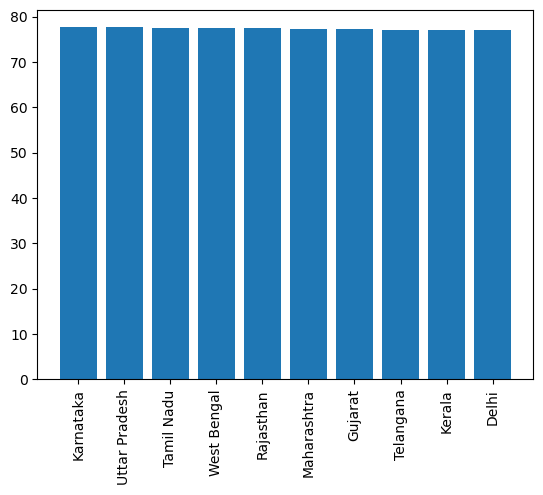

In [4]:
plt.bar(df.State.unique(), state_avg_scores ,)
plt.xticks(rotation = 90)
plt.show()

In [5]:
df = df[df['Gender'] != 'Other']
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
5,64,Female,127000,850,158,10,108702,111,Yes,Tamil Nadu,Coimbatore,82.331250,Self-Employed,92,Contractor


In [6]:
bins = [300, 579, 669, 739, 799, 850]  # The bins for categorizing the credit scores
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']  # Labels for each bin

# Step 2: Use pd.cut() to categorize the credit scores
df['credit_score_category'] = pd.cut(df['Credit Score'], bins=bins, labels=labels, include_lowest=True)


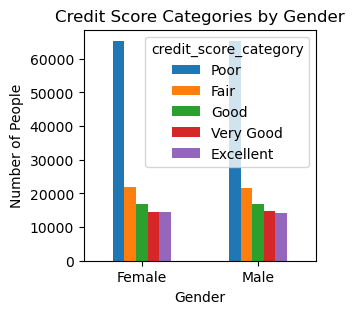

In [7]:
# Assuming the 'credit_score_category' column has been created
credit_score_group = df.groupby(['Gender', 'credit_score_category']).size().unstack()
# Plot a stacked bar chart
credit_score_group.plot(kind='bar', stacked=False, figsize=(3, 3))

plt.title('Credit Score Categories by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')

plt.xticks(rotation=0)
plt.show()


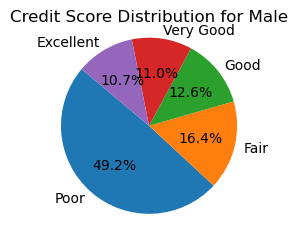

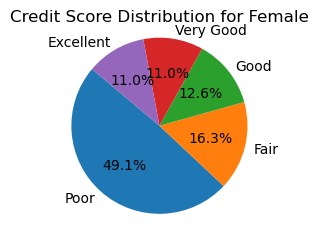

In [8]:

# Assuming 'credit_score_category' is already created using pd.cut()

# Step 1: Group the data by 'Gender' and 'credit_score_category'
gender_credit_score_group = df.groupby(['Gender', 'credit_score_category']).size()

# Step 2: Create pie charts for each gender
genders = df['Gender'].unique()  # Get unique genders from the dataset

for gender in genders:
    # Filter the data for the current gender
    data_for_gender = gender_credit_score_group[gender]
    
    # Step 3: Plot a pie chart for the current gender
    plt.figure(figsize=(2.5, 2.5))
    plt.pie(data_for_gender, labels=data_for_gender.index, autopct='%1.1f%%', startangle=140)
    
    plt.title(f'Credit Score Distribution for {gender.capitalize()}')
    plt.axis('equal') # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()


In [9]:
occupation_score = df.groupby('Occupation')['Profile Score'].mean().sort_values(ascending=False)
occupation_score

Occupation
Civil Servant             82.483099
Banker                    82.470403
Software Engineer         82.262676
Teacher                   82.232763
Doctor                    82.089233
Contractor                75.933970
Business Owner            75.359043
Farmer                    75.319285
Shopkeeper                75.288871
Writer                    74.508218
Photographer              73.986509
Independent Consultant    73.667228
Graphic Designer          73.438800
Student                   65.646187
Name: Profile Score, dtype: float64

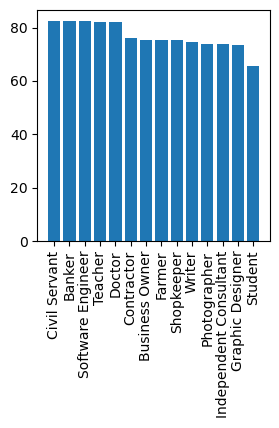

In [10]:
plt.figure(figsize= (3,3))
plt.bar(occupation_score.index, occupation_score)
plt.xticks(rotation= 90)
plt.show()

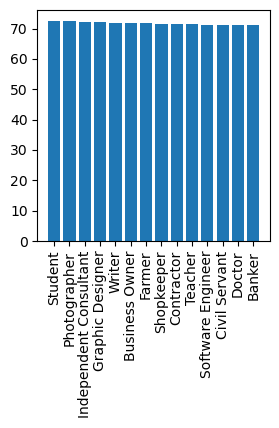

In [11]:
occupation_ltv = df.groupby('Occupation')['LTV Ratio'].mean().sort_values(ascending = False)

plt.figure(figsize = (3,3))
plt.bar(occupation_ltv.index, occupation_ltv)
plt.xticks(rotation = 90)
plt.show()

In [12]:
age_bin = [18, 24, 34, 44, 54, 64, 70]
age_label = ['Young Adult', 'Early Career', 'Mid Career', 'Late Career', 'Pre-Retirement', 'Senior']

df['age_class']= pd.cut(df['Age'], bins = age_bin, labels = age_label, include_lowest=True)


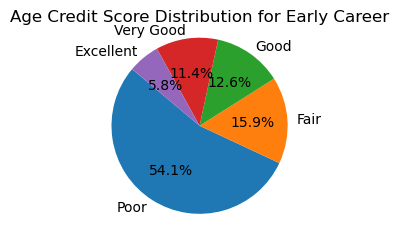

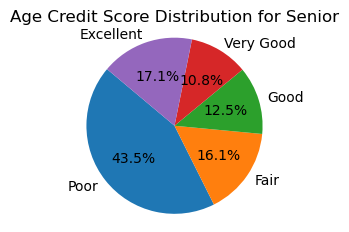

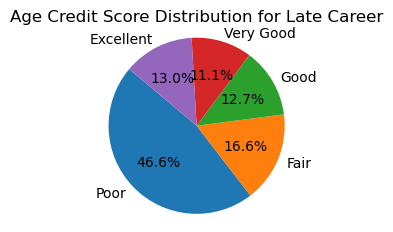

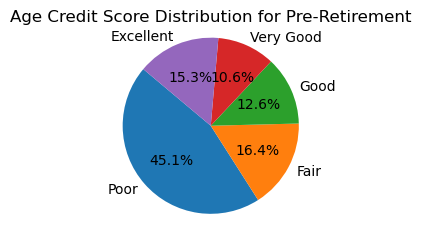

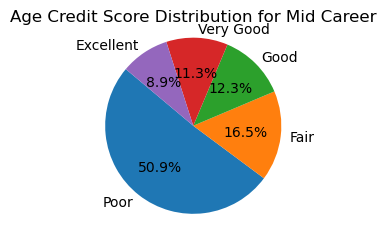

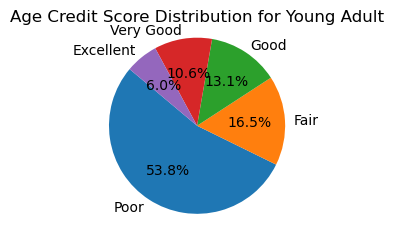

In [13]:


# Step 1: Group by 'age_class' and 'credit_score_category', and get the counts
age_credit_score_category = df.groupby(['age_class', 'credit_score_category']).size()

# Step 2: Create pie charts for each age group
age_groups = df['age_class'].unique()  # Get unique age groups from the dataset

for age in age_groups:
    # Filter the data for the current age group
    data_for_age = age_credit_score_category[age]
    
    # Step 3: Plot a pie chart for the current age group
    plt.figure(figsize=(2.5, 2.5))  # Increase size for better readability
    plt.pie(data_for_age, labels=data_for_age.index, autopct='%1.1f%%', startangle=140)
    
    plt.title(f'Age Credit Score Distribution for {age}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()


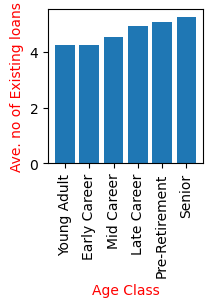

In [14]:
age_existing_loan = df.groupby('age_class')['Number of Existing Loans'].mean()

plt.figure(figsize= (2,2))
plt.bar(age_existing_loan.index,age_existing_loan) 
plt.xticks(rotation = 90)
plt.xlabel('Age Class', color = 'red')
plt.ylabel('Ave. no of Existing loans', color ='red')
plt.show()

In [15]:
df1 = pd.read_csv("C:/Users/CORE i5/Documents/Datasets/car loan database.zip")
df1

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,495,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer
279852,45,Female,124000,850,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant
279853,33,Female,71000,582,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,NaN
279854,67,Male,191000,411,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer


In [16]:
df1 = df1.drop(['Existing Customer', 'State', 'City', 'Occupation'], axis = 1)
df1.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Employment Profile,Profile Score
0,31,Male,36000,604,487,5,109373,221,90.943430,Salaried,77
1,25,Male,50000,447,386,2,150000,89,91.135253,Salaried,43
2,62,Other,178000,850,503,10,69099,110,40.000000,Salaried,90
3,69,Female,46000,668,349,6,150000,148,87.393365,Self-Employed,86
4,52,Male,132000,601,553,5,150000,157,66.158757,Salaried,90


In [ ]:
df1

In [18]:


# Define a function to remove outliers based on IQR for numeric columns only
def remove_outliers(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    Q1 = numeric_df.quantile(0.25)  # 1st quartile (25th percentile)
    Q3 = numeric_df.quantile(0.75)  # 3rd quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the dataset to remove outliers based on numeric columns
    return df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

# Apply the function to your dataset
df_cleaned = remove_outliers(df1)


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_cleaned = df_cleaned[df_cleaned['Gender'] != 'Other']
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned['Employment Profile'] = le.fit_transform(df_cleaned['Employment Profile'])
df_cleaned.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Employment Profile,Profile Score
0,31,1,36000,604,487,5,109373,221,90.943430,1,77
1,25,1,50000,447,386,2,150000,89,91.135253,1,43
3,69,0,46000,668,349,6,150000,148,87.393365,2,86
4,52,1,132000,601,553,5,150000,157,66.158757,1,90
5,64,0,127000,850,158,10,108702,111,82.331250,2,92


In [ ]:
data = [[31, 1, 36000, 604]]

new_data_scaled = standard_scaler.transform([[
            36000, 604, 487,
            109373, 221, 91
        ]])

full_features = [31, 1, 1, no_of_existing_loans] + list(new_data_scaled[0])

        # Make prediction using the full feature set
result = model.predict([full_features])

In [24]:
df_cleaned.columns.unique()

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure', 'LTV Ratio',
       'Employment Profile', 'Profile Score'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df_cleaned.drop(['Profile Score'], axis = 1)
x = sc.fit_transform(x_train[['Income', 'Credit Score', 'Credit History Length','Loan Amount', 'Loan Tenure', 'LTV Ratio']])
y = df_cleaned[['Profile Score']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [30]:
sc= StandardScaler()


x_train[['Income', 'Credit Score', 'Credit History Length','Loan Amount', 'Loan Tenure', 'LTV Ratio']] = sc.fit_transform(x_train[['Income', 'Credit Score', 'Credit History Length','Loan Amount', 'Loan Tenure', 'LTV Ratio']])
x_test[['Income', 'Credit Score', 'Credit History Length','Loan Amount', 'Loan Tenure', 'LTV Ratio']] = sc.transform(x_test[['Income', 'Credit Score', 'Credit History Length','Loan Amount', 'Loan Tenure', 'LTV Ratio']])

x_train.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Employment Profile
131953,63,0,-0.900970,1.465764,-1.399802,9,-1.699047,-0.089858,-0.152254,0
66351,49,1,0.632063,-0.401500,-1.542539,3,0.964308,-0.869261,0.990392,2
111951,64,1,0.867914,1.638316,-0.006687,10,1.092536,2.102863,0.022199,2
244762,37,1,-0.783044,-1.560067,1.340752,0,-1.333707,-0.318483,1.299294,1
215003,19,0,-1.490598,1.126821,1.529165,8,-2.377781,0.460920,0.024931,2


In [36]:
from sklearn.linear_model import LinearRegression, RidgeCV

model =RidgeCV()
model.fit(x_train, y_train)

RidgeCV()

In [37]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score

# Assuming you have your actual values (y_true) and predicted values (y_pred)
r2 = r2_score(y_test, y_pred)
print("Model's Accuracy appears to be", r2*100,'%.', '  Pretty good if you ask me')






Model's Accuracy appears to be 69.34518723868445 %.   Pretty good if you ask me


In [33]:
import pickle 
pickle.dump(sc, open('scaler.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))